In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer



seed = 42
np.random.seed(seed)
random.seed(seed)

In [2]:
df = pd.read_csv('train.csv')
df = df.drop_duplicates()
print(df.shape)
df.head()

(252123, 91)


,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
0,2007,44.76752,114.82099,3.83239,27.99928,1.49153,-15.90853,28.24844,3.61650,-7.24653,...,-1.89619,-471.02844,411.56205,443.01198,19.30254,309.07806,-336.91706,-14.70547,-474.44157,31.32820
1,2004,52.28942,75.73319,11.35941,-6.20582,-27.64559,-30.75995,12.50955,7.47877,9.88498,...,4.57060,1.36110,-6.52977,59.48672,3.69790,-36.92252,44.08077,3.39993,-70.07591,3.86143
2,2005,33.81773,-139.07371,134.19332,17.85216,63.47408,-25.28005,-34.65911,-5.99135,1.27848,...,54.16608,15.04530,39.09107,39.03041,3.68708,-61.88547,45.68115,6.39822,3.24471,35.74749
3,1998,41.60866,3.17811,-3.97174,23.53564,-19.68553,20.74407,18.80866,6.24474,-7.98424,...,28.08591,295.88684,54.02395,102.02880,40.47711,15.10258,-250.32293,2.81288,56.05172,3.60432
4,1987,44.49525,-32.25270,58.08217,3.73684,-32.53274,-18.72885,-15.85665,-3.34607,22.63786,...,31.44988,-136.50457,-85.11989,-74.96342,9.56921,-100.61689,-133.29315,9.19246,-97.37953,30.11015


In [3]:
X = df.drop('Year',axis=1)
y = df['Year']

## LINEAR REGRESSION

In [11]:
# Split in train e validation 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train set: ", X_train.shape[0])
print("Numebr of test set: ", X_val.shape[0])

Number of train set:  201698
Numebr of test set:  50425


### Linear Regression senza pre-processing

In [12]:
model_lr = LinearRegression()

# Train
model_lr.fit(X_train, y_train)

y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_val)

print("R² (Train):", r2_score(y_train, y_train_pred_lr))
print("R² (Test):", r2_score(y_val, y_test_pred_lr))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_lr))
print("MSE (Test):", mean_squared_error(y_val, y_test_pred_lr))
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_lr))
print("MAE (Test):", mean_absolute_error(y_val, y_test_pred_lr))
print("MAPE (Train):", mean_absolute_percentage_error(y_train, y_train_pred_lr))
print("MAPE (Test):", mean_absolute_percentage_error(y_val, y_test_pred_lr))
print("RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_val, y_test_pred_lr)))

R² (Train): 0.2336878960607075
R² (Test): 0.2342957615608019
MSE (Train): 84.68153450339348
MSE (Test): 83.45601933266238
MAE (Train): 6.634349387086157
MAE (Test): 6.605412851370803
MAPE (Train): 0.0033302572135691616
MAPE (Test): 0.003315296723280814
RMSE (Train): 9.202257033108426
RMSE (Test): 9.135426609231907


### Linear Regression con Standard Scale

In [14]:
# Standard Scaler

scaler = StandardScaler()

X_train_ss = scaler.fit_transform(X_train)
X_val_ss = scaler.transform(X_val)

In [15]:
model_lr_ss = LinearRegression()

model_lr_ss.fit(X_train_ss, y_train)

y_train_pred_lr = model_lr_ss.predict(X_train_ss)
y_val_pred_lr = model_lr_ss.predict(X_val_ss)

print("R² (Train):", r2_score(y_train, y_train_pred_lr))
print("R² (Val):", r2_score(y_val, y_val_pred_lr))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_lr))
print("MSE (Val):", mean_squared_error(y_val, y_val_pred_lr))
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_lr))
print("MAE (Val):", mean_absolute_error(y_val, y_val_pred_lr))
print("MAPE (Train):", mean_absolute_percentage_error(y_train, y_train_pred_lr))
print("MAPE (Val):", mean_absolute_percentage_error(y_val, y_val_pred_lr))
print("RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("RMSE (Val):", np.sqrt(mean_squared_error(y_val, y_val_pred_lr)))

R² (Train): 0.2336878960607075
R² (Val): 0.2342957615608019
MSE (Train): 84.68153450339348
MSE (Val): 83.45601933266238
MAE (Train): 6.634349387086168
MAE (Val): 6.605412851370814
MAPE (Train): 0.0033302572135691672
MAPE (Val): 0.0033152967232808186
RMSE (Train): 9.202257033108426
RMSE (Val): 9.135426609231907


#### **Provato anche PCA con risultati pessimi**

### Linear Regression con Power Normalization 

In [17]:
transformerPN = PowerTransformer(method='yeo-johnson')

transformerPN.fit(X_train)

X_train_pn = transformerPN.transform(X_train)
X_val_pn = transformerPN.transform(X_val)

In [18]:
model_lr_pn = LinearRegression()

model_lr_pn.fit(X_train_pn, y_train)

y_train_pred_lr = model_lr_pn.predict(X_train_pn)
y_val_pred_lr = model_lr_pn.predict(X_val_pn)

print("R² (Train):", r2_score(y_train, y_train_pred_lr))
print("R² (Val):", r2_score(y_val, y_val_pred_lr))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_lr))
print("MSE (Val):", mean_squared_error(y_val, y_val_pred_lr))
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_lr))
print("MAE (Val):", mean_absolute_error(y_val, y_val_pred_lr))
print("MAPE (Train):", mean_absolute_percentage_error(y_train, y_train_pred_lr))
print("MAPE (Val):", mean_absolute_percentage_error(y_val, y_val_pred_lr))
print("RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("RMSE (Val):", np.sqrt(mean_squared_error(y_val, y_val_pred_lr)))

R² (Train): 0.23918622214333407
R² (Val): 0.2398095654489053
MSE (Train): 84.07394043371436
MSE (Val): 82.85505606149118
MAE (Train): 6.572290681379799
MAE (Val): 6.554128843582895
MAPE (Train): 0.0032992310541417255
MAPE (Val): 0.003289659957525731
RMSE (Train): 9.16918428398701
RMSE (Val): 9.102475271127695


### Linear Regression con normalizzazione L1/L2

In [20]:
normalizer = Normalizer(norm='l1')

X_train_normalized = normalizer.fit_transform(X_train)
X_val_normalized = normalizer.fit_transform(X_val)

In [21]:
model_lr_norm = LinearRegression()

model_lr_norm.fit(X_train_normalized, y_train)

y_train_pred_lr = model_lr_norm.predict(X_train_normalized)
y_val_pred_lr = model_lr_norm.predict(X_val_normalized)

print("R² (Train):", r2_score(y_train, y_train_pred_lr))
print("R² (Val):", r2_score(y_val, y_val_pred_lr))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_lr))
print("MSE (Val):", mean_squared_error(y_val, y_val_pred_lr))
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_lr))
print("MAE (Val):", mean_absolute_error(y_val, y_val_pred_lr))
print("MAPE (Train):", mean_absolute_percentage_error(y_train, y_train_pred_lr))
print("MAPE (Val):", mean_absolute_percentage_error(y_val, y_val_pred_lr))
print("RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("RMSE (Val):", np.sqrt(mean_squared_error(y_val, y_val_pred_lr)))

R² (Train): 0.1712870346310561
R² (Val): 0.1727622457819573
MSE (Train): 91.5771592404068
MSE (Val): 90.16271106119945
MAE (Train): 7.105563495277293
MAE (Val): 7.071722195967023
MAPE (Train): 0.0035663530895073074
MAPE (Val): 0.003548945139085848
RMSE (Train): 9.569595563053165
RMSE (Val): 9.495404733933118


## Migliori performance -> Power Normalization 

In [22]:
# Predizioni su test set
y_val_pred_lr = model_lr_pn.predict(X_val_pn)

print("R² (Test):", r2_score(y_val, y_val_pred_lr))
print("MSE (Test):", mean_squared_error(y_val, y_val_pred_lr))
print("MAE (Test):", mean_absolute_error(y_val, y_val_pred_lr))
print("MAPE (Test):", mean_absolute_percentage_error(y_val, y_val_pred_lr))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_val, y_val_pred_lr)))

R² (Test): 0.2398095654489053
MSE (Test): 82.85505606149118
MAE (Test): 6.554128843582895
MAPE (Test): 0.003289659957525731
RMSE (Test): 9.102475271127695


In [14]:
file_power_norm = open("modelli/LR/normal_lr.save","wb")
pickle.dump(transformerPN, file_power_norm)
file_power_norm.close()
file_model = open("modelli/LR/model_lr.save","wb")
pickle.dump(model_lr_pn, file_model)
file_model.close()

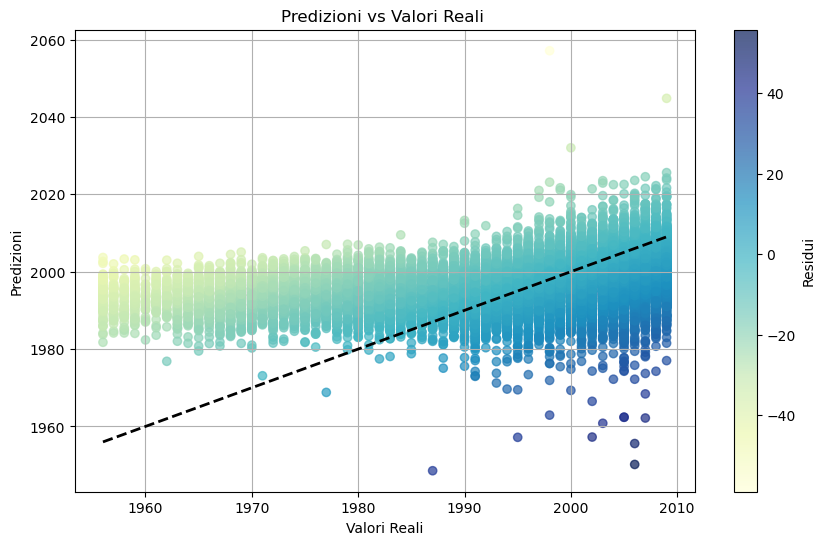

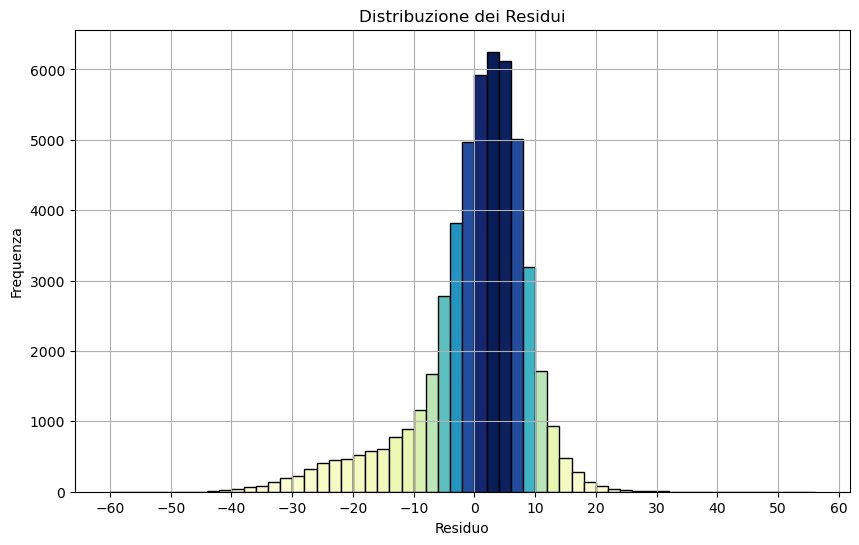

In [24]:
# Calcolo dei residui
residui = y_val - y_test_pred_lr

# Scatter Plot delle Predizioni vs Valori Reali con scala di colori YlGnBu
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_val, y_test_pred_lr, c=residui, cmap='YlGnBu', alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Linea ideale
plt.xlabel('Valori Reali')
plt.ylabel('Predizioni')
plt.title('Predizioni vs Valori Reali ')
plt.colorbar(scatter, label='Residui')
plt.grid(True)
plt.show()




min_bin = int(np.floor(min(residui) / 2) * 2)
max_bin = int(np.ceil(max(residui) / 2) * 2)
bins = np.arange(min_bin, max_bin + 2, 2)
hist, bin_edges = np.histogram(residui, bins=bins)
cmap = plt.get_cmap('YlGnBu')
colors = [cmap((h - min(hist)) / (max(hist) - min(hist))) for h in hist]
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=2, color=colors, edgecolor='black', align='edge')
plt.xlabel('Residuo')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei Residui')
plt.grid(True)
min_tick = int(np.floor(min_bin / 10) * 10)
max_tick = int(np.ceil(max_bin / 10) * 10)
xticks = np.arange(min_tick, max_tick + 10, 10)
plt.xticks(xticks)
plt.show()